<a href="https://colab.research.google.com/github/naveen-98/MiniProject_MachineLearning/blob/main/miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/ps5.csv')

In [ ]:
# Display the first few rows of the dataset
print(df.head())

                                                 url  \
0  https://store.playstation.com/en-us/product/UP...   
1  https://store.playstation.com/en-us/product/UP...   
2  https://store.playstation.com/en-us/product/UP...   
3  https://store.playstation.com/en-us/product/UP...   
4  https://store.playstation.com/en-us/product/UP...   

                                     id                       publisherName  \
0  UP0101-PPSA19225_00-0159266583099383  Konami Digital Entertainment, Inc.   
1  UP2565-PPSA04379_00-0242096879154610         astragon Entertainment GmbH   
2  UP4040-PPSA04721_00-HUNDREDHEROESDLX                           505 Games   
3  UP4040-PPSA04721_00-EIYUDENHEROESPS5                           505 Games   
4  UP9000-PPSA13196_00-STELLARBLADEDDE0      Sony Interactive Entertainment   

            releaseDate                                               name  \
0  2024-03-28T04:00:00Z                                      Felix the Cat   
1  2024-04-04T15:00:00Z         

In [ ]:
# Get summary statistics
print(df.describe())


       starRating/averageRating  starRating/totalRatingsCount
count               2001.000000                  2.001000e+03
mean                   3.934218                  1.364253e+04
std                    0.882803                  2.587326e+05
min                    0.000000                  0.000000e+00
25%                    3.640000                  1.700000e+01
50%                    4.160000                  7.300000e+01
75%                    4.500000                  5.010000e+02
max                    5.000000                  6.661979e+06


In [ ]:
# Get information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           2001 non-null   object 
 1   id                            2001 non-null   object 
 2   publisherName                 2000 non-null   object 
 3   releaseDate                   2001 non-null   object 
 4   name                          2001 non-null   object 
 5   isAgeRestricted               2001 non-null   bool   
 6   activeCtaId                   2001 non-null   object 
 7   starRating/averageRating      2001 non-null   float64
 8   starRating/totalRatingsCount  2001 non-null   int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 127.1+ KB
None


In [ ]:
# Check for missing values
print(df.isnull().sum())


url                             0
id                              0
publisherName                   1
releaseDate                     0
name                            0
isAgeRestricted                 0
activeCtaId                     0
starRating/averageRating        0
starRating/totalRatingsCount    0
dtype: int64


In [ ]:
# Drop or fill missing values
df = df.dropna()  # or use df.fillna(method='ffill') for forward filling

In [ ]:
# Check for duplicates
df = df.drop_duplicates()

In [ ]:
# Inspect the releaseDate column
print(df['releaseDate'].head())
print(df['releaseDate'].dtype)


0    2024-03-28T04:00:00Z
1    2024-04-04T15:00:00Z
2    2024-04-21T13:00:00Z
3    2024-04-23T13:00:00Z
4    2024-04-26T04:00:00Z
Name: releaseDate, dtype: object
object


In [ ]:
# Convert releaseDate to datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Check for any conversion issues
print(df['releaseDate'].isnull().sum())  # This will show how many entries could not be converted

0


In [ ]:
# Extract year and month from releaseDate
df['releaseYear'] = df['releaseDate'].dt.year
df['releaseMonth'] = df['releaseDate'].dt.month

# Verify the new columns
print(df[['releaseDate', 'releaseYear', 'releaseMonth']].head())


                releaseDate  releaseYear  releaseMonth
0 2024-03-28 04:00:00+00:00         2024             3
1 2024-04-04 15:00:00+00:00         2024             4
2 2024-04-21 13:00:00+00:00         2024             4
3 2024-04-23 13:00:00+00:00         2024             4
4 2024-04-26 04:00:00+00:00         2024             4


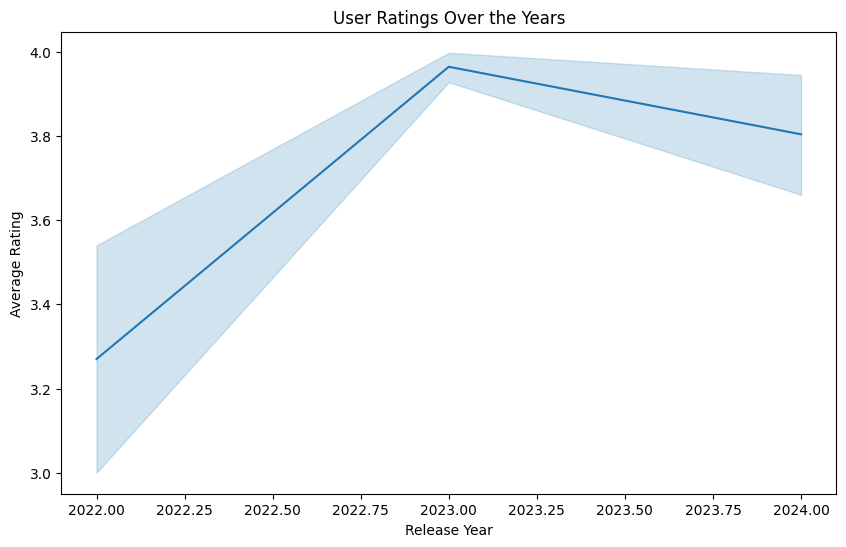

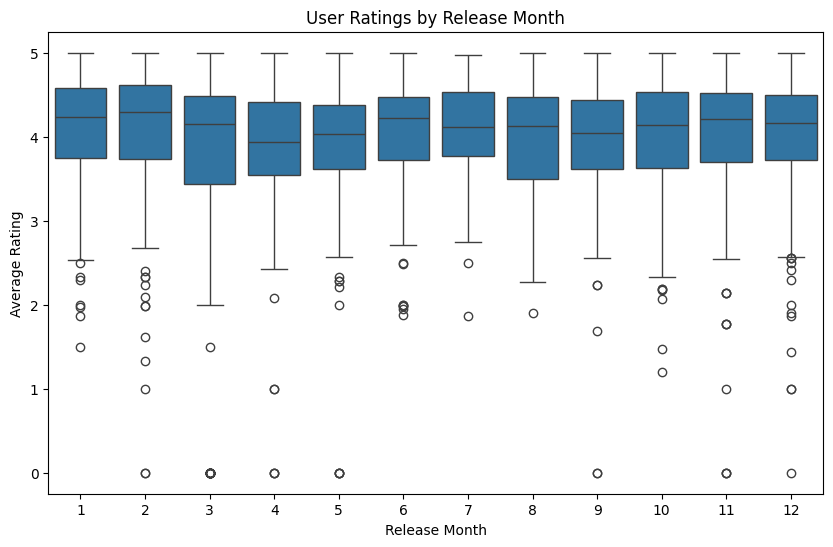

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot user ratings over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='releaseYear', y='starRating/averageRating', data=df)
plt.title('User Ratings Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()

# Distribution of user ratings by release month
plt.figure(figsize=(10, 6))
sns.boxplot(x='releaseMonth', y='starRating/averageRating', data=df)
plt.title('User Ratings by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Rating')
plt.show()


publisherName
SUNSOFT (SUNCORPORATION)        5.0
502 Studios, SA                 5.0
Flux Game Studio                5.0
Means Interactive, LLC          5.0
Digerati Distribution           5.0
Megalithic Mainframe, L.L.C.    5.0
ARTE FRANCE SA                  5.0
GUMBO MACHINE, LLC              5.0
LLC SHINYUDEN                   5.0
Battle Geek Plus L.L.C.         5.0
Name: starRating/averageRating, dtype: float64


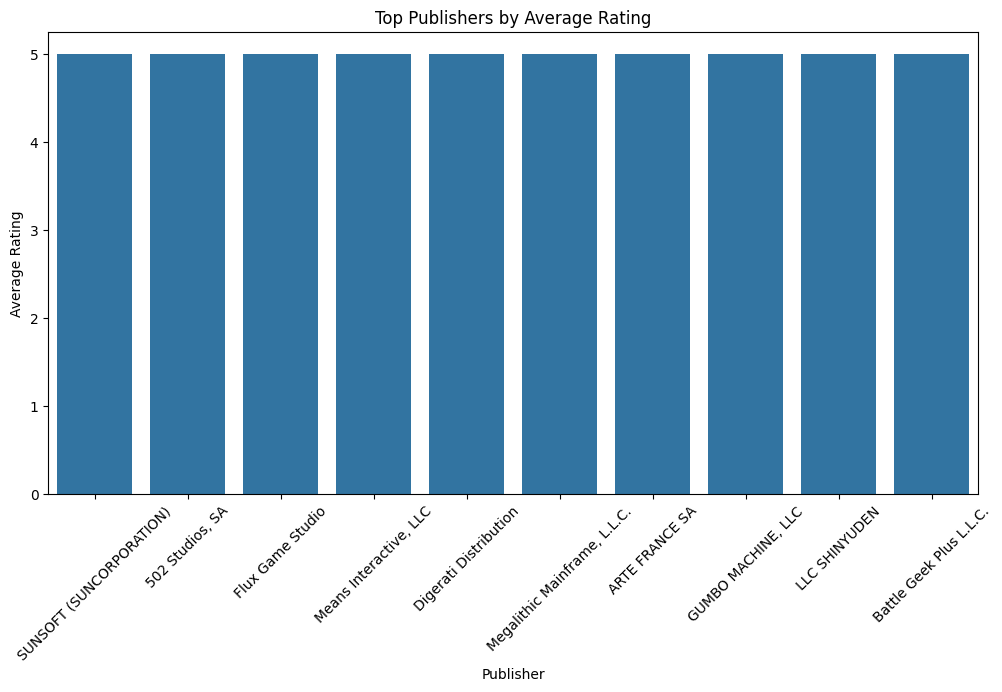

In [ ]:
# Top publishers by average rating
top_publishers = df.groupby('publisherName')['starRating/averageRating'].mean().sort_values(ascending=False).head(10)
print(top_publishers)

# Plot average ratings for top publishers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top Publishers by Average Rating')
plt.xlabel('Publisher')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


isAgeRestricted
False    3.8
True     4.5
Name: starRating/averageRating, dtype: float64


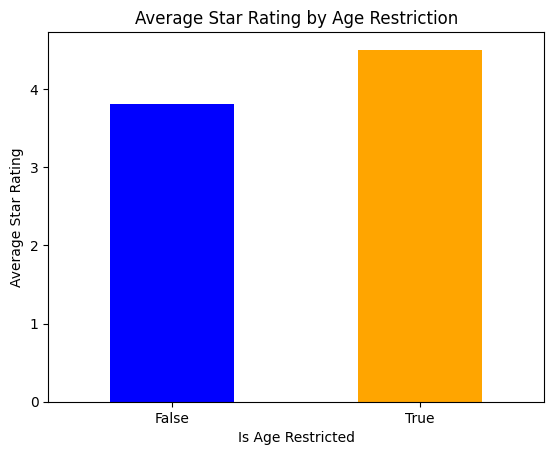

In [ ]:
import pandas as pd

# Example DataFrame
data = {
    'url': ['http://example.com', 'http://example2.com'],
    'id': ['1', '2'],
    'publisherName': ['Publisher1', 'Unknown'],
    'releaseDate': ['2022-01-01', '2022-02-01'],
    'name': ['Item1', 'Item2'],
    'isAgeRestricted': [True, False],
    'activeCtaId': ['cta1', 'cta2'],
    'starRating/averageRating': [4.5, 3.8],
    'starRating/totalRatingsCount': [100, 50]
}

df = pd.DataFrame(data)

# Average rating by age restriction
age_restrictions = df.groupby('isAgeRestricted')['starRating/averageRating'].mean()
print(age_restrictions)

# Optionally, if you want to visualize the result:
import matplotlib.pyplot as plt

age_restrictions.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Is Age Restricted')
plt.ylabel('Average Star Rating')
plt.title('Average Star Rating by Age Restriction')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()


In [ ]:
print(df.columns)


Index(['url', 'id', 'publisherName', 'releaseDate', 'name', 'isAgeRestricted',
       'activeCtaId', 'starRating/averageRating',
       'starRating/totalRatingsCount'],
      dtype='object')


In [ ]:
# Check for string values in features
print(df.select_dtypes(include=['object']).columns)


Index(['url', 'id', 'publisherName', 'releaseDate', 'name', 'activeCtaId'], dtype='object')


In [ ]:
# Check for string values in target variable
print(df['starRating/averageRating'].dtype)


float64


In [ ]:
# Drop non-numeric columns (if any)
non_numeric_cols = df.select_dtypes(include=['object']).columns
df.drop(columns=non_numeric_cols, inplace=True)

# Define features and target variable
X = df.drop(columns=['starRating/averageRating', 'starRating/totalRatingsCount'])
y = df['starRating/averageRating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.49000000000000027


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


R-squared: nan


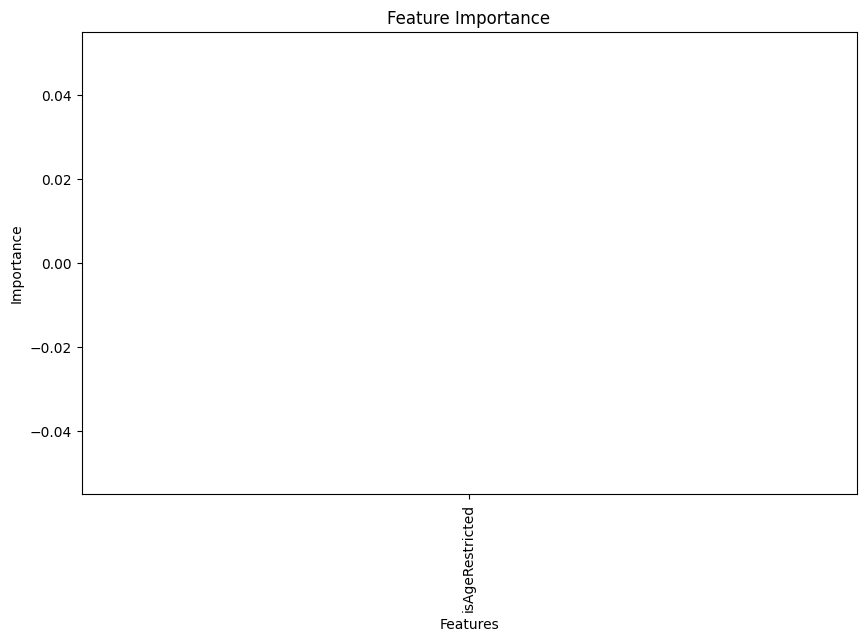

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
import joblib

# Save the model for future use
joblib.dump(model, 'ps5_game_rating_predictor.pkl')


['ps5_game_rating_predictor.pkl']